Wczytanie danych

In [42]:
import pandas as pd
import numpy as np

data=pd.read_excel("Staż letni OtoMoto.xlsx",sheet_name=0,usecols=[0, 1, 2])

In [43]:
data.head()

,Date,Source_id,No_visits
0,2017-01-02,2,2.0
1,2017-01-03,2,5.0
2,2017-01-05,2,5.0
3,2017-01-06,2,8.0
4,2017-01-01,2,10.0


Sortowanie zbioru danych datą rosnąco

In [44]:
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values(by='Date', ascending=True)

In [45]:
data.head()

,Date,Source_id,No_visits
67,2017-01-01,1,100.0
4,2017-01-01,2,10.0
362,2017-01-01,3,50.0
0,2017-01-02,2,2.0
363,2017-01-02,3,11.0


Podczas początkowej analizy dancyh zauważyłem, że w zbiorze danych znajdują się wartości ujemne oraz niecałkowite. W przypadku wartosći ujemnych zmieniam ich wartość na zero, ponieważ nie da się osiągnąć ujemnych wyświetleń strony. Wartośći niecałkowite zostaną zaokrąglone do liczb całkowitych.

In [46]:
non_positive_rows = data[data['No_visits'] < 0]


print(non_positive_rows)

          Date  Source_id  No_visits
247 2017-01-04          2       -2.0


In [47]:
non_integer_rows = data[data['No_visits'] % 1 != 0]
print(non_integer_rows)

          Date  Source_id  No_visits
157 2017-02-01          1      347.6
215 2017-02-08          1      458.2


In [48]:
#zamiana wartości ujemnych na zero
data['No_visits'] = data['No_visits'].apply(lambda x: x if x > 0 else 0)

#zaokralenie do najbliższej liczby całkowitej
data['No_visits'] = data['No_visits'].round().astype(int)

Zadanie 1: Przedstaw na wykresie dziennny rozkład wizyt użytkowników. Wybierz najlepszy typ wykresu.

Zastosowano wykres liniowy, ponieważ z niego można zauważyć trendy dotyczące liczby odwiedziń

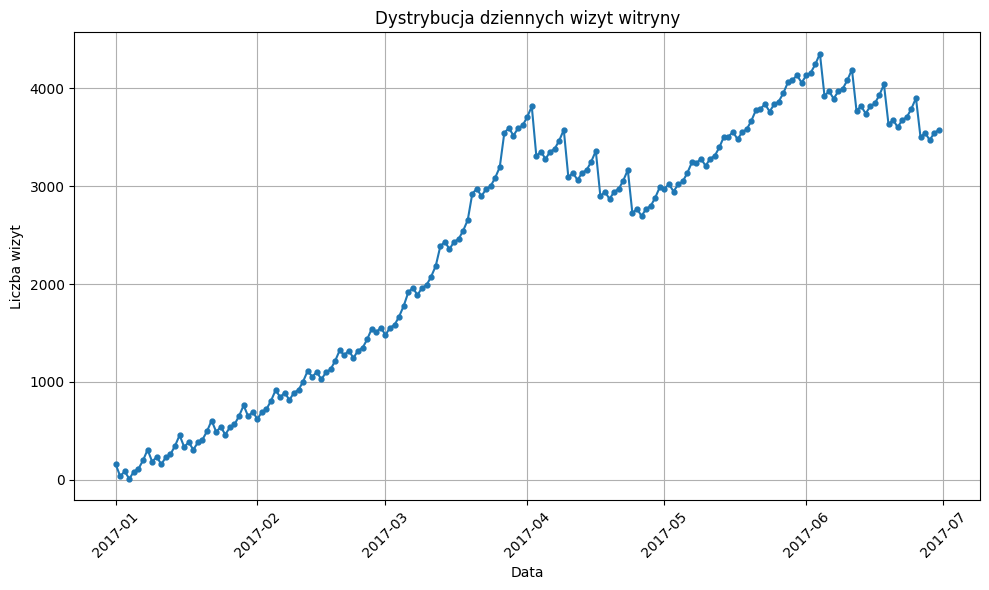

In [49]:
import matplotlib.pyplot as plt

#zsumowanie wizyt z wszsytkich  kanałów
daily_visits = data.groupby('Date')['No_visits'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(daily_visits['Date'], daily_visits['No_visits'], marker='o', markersize=3.5, linestyle='-')
plt.title('Dystrybucja dziennych wizyt witryny')
plt.xlabel('Data')
plt.ylabel('Liczba wizyt')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Zadanie 2: Który z kanałów jest najbardziej popularny wśród klientów w badanym okresie. Jaki udział klientów z niego korzysta?

In [50]:
source_visits = data.groupby('Source_id')['No_visits'].sum().reset_index()
print(source_visits)


   Source_id  No_visits
0          1     254051
1          2      43081
2          3     141510


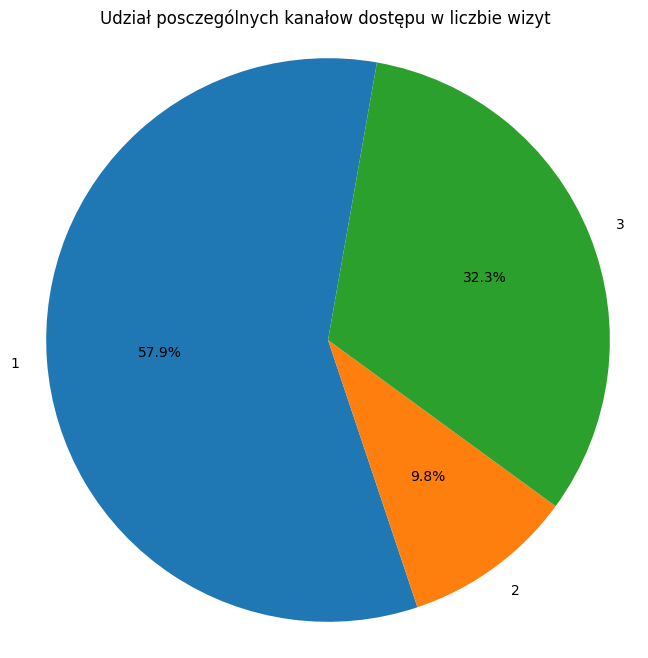

In [51]:
plt.figure(figsize=(8, 8))
plt.pie(source_visits['No_visits'], labels=source_visits['Source_id'], autopct='%1.1f%%', startangle=80)
plt.title('Udział posczególnych kanałow dostępu w liczbie wizyt ')
plt.axis('equal')  

# Display the plot
plt.show()

Najbardziej popularnym z kanałow jest kanał numer 1. Korzysta z niego 57,9 procent klientów.

Zadanie 3: Który z miesięcy charakteryzował się największym bezwględnym przyrostem wizyt użytkowników? Ile on wyniósł?

In [52]:
data['Year_month'] = data['Date'].dt.to_period('M') #dodanie kolumny zawierającej jedynie rok i miesąc

In [53]:
#obliczenie sumy wizyt w każdym miesiącu
monthly_visits = data.groupby('Year_month')['No_visits'].sum().reset_index()
print(monthly_visits)


  Year_month  No_visits
0    2017-01      11083
1    2017-02      30695
2    2017-03      78233
3    2017-04      93939
4    2017-05     109139
5    2017-06     115553


In [54]:
# Obliczenie róznicy liczby odwiedziń w posczególnych miesiącach
monthly_visits['Visit_change'] = monthly_visits['No_visits'].diff().abs()
print(monthly_visits)


  Year_month  No_visits  Visit_change
0    2017-01      11083           NaN
1    2017-02      30695       19612.0
2    2017-03      78233       47538.0
3    2017-04      93939       15706.0
4    2017-05     109139       15200.0
5    2017-06     115553        6414.0


In [55]:
# Odszukanie największej róznicy wyswieteń
max_increase = monthly_visits.loc[monthly_visits['Visit_change'].idxmax()]
print(max_increase)

Year_month      2017-03
No_visits         78233
Visit_change    47538.0
Name: 2, dtype: object


Największym bezwględnym przyrostem wizyt użytkowników charakterzyował się marzec. Bezwględny przyrost wizyt w tym miesiącu wynosił 47538

Zadanie 4:  Załóżmy, że popełniono błąd i zamiast liczby wizyt mamy do czynienia z liczbą unikalnych użytkowników. Jaki nowe możliwości lub ograniczenia wnosi nowa zmienna w zadaniu 2.

W przypadku gdyby popełniono taki błąd wprowadziło by to następujące korzyści:
- Pozwala to sprawdzić ilu unikalnych użytkowników, korzysta z danego kanału. Wykluczone są wtedy wielokrotne interakcje jednego użytkownika.
- W przypadku śledzenia uniklanych użytkowników, można dokonać segmentacji klientów w połaczeniu z danymi dotyczącymi ich konta.

Wprowadzana to następujące ograniczenia:
- Nie jest się w stanie okreslić faktycznego ruchu na stronie.
- Nie da się stwierdzić, który kanał jest najskuteczniejszy, użytkownicy jednego kanału mogą odwiedzać stronę częsciej. W konsekwencji możliwe jest otrzymanie przekłamanych wyników.


Zadanie 5: Dokonaj oceny/interpretacji przedstawionych danych.

Z przedstawionych danych można zauważyć, że liczba odwiedzin strony do kwietnia stale rosła. Poźniej nadal zachowana jest tendencja wzrostowa, która poprzedzana jest spadkami aktywności. Możliwe, że wzrost aktywności w okresach od kwietnia do marca spowodowany był akcjami promocyjnymi dotyczącymi strony. Największa aktywność na stronie osiągana jest przy użyciu kanału numer 1, która stanowi 57,9% wszystkich aktywnośći. Drugim co do popularnosći kanałem jest kanał numer 3 (32,3%). Najgorzej spisuje się kanał numer 3, na którym odnotowano jedynie 9,8% wszystkich aktywności. W danych można zauważyć również silną sezonowość związaną z dniem tygodnia.

In [56]:
data_day=data.copy()
data_day['Day_of_week'] = data_day['Date'].dt.day_name()
day_of_week_visits = data_day.groupby('Day_of_week')['No_visits'].sum().reset_index()
days_order = [
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
]
day_of_week_visits['Day_of_week'] = pd.Categorical(day_of_week_visits['Day_of_week'], categories=days_order, ordered=True)
day_of_week_visits = day_of_week_visits.sort_values('Day_of_week')

print(day_of_week_visits)

  Day_of_week  No_visits
1      Monday      61577
5     Tuesday      62825
6   Wednesday      60851
4    Thursday      62773
0      Friday      63527
2    Saturday      62102
3      Sunday      64987


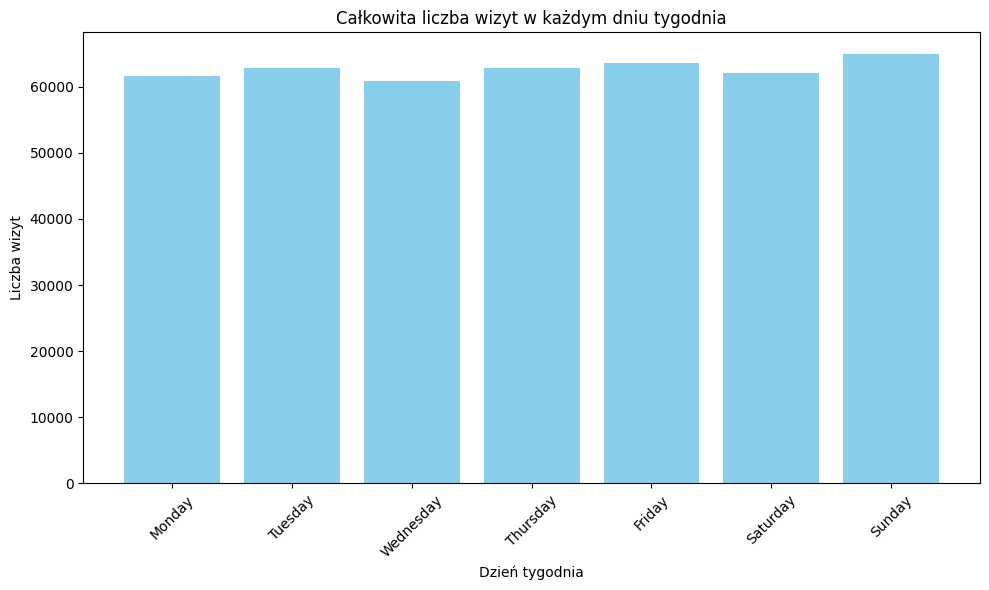

In [57]:
# Tworzymy wykres słupkowy
plt.figure(figsize=(10, 6))
plt.bar(day_of_week_visits['Day_of_week'], day_of_week_visits['No_visits'], color='skyblue')

plt.xlabel('Dzień tygodnia')
plt.ylabel('Liczba wizyt')
plt.title('Całkowita liczba wizyt w każdym dniu tygodnia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Seznowość jest sczególnie widoczna dla danych z kwietnia, maja, oraz czerwca

In [58]:
data_day = data_day[(data_day['Date'].dt.month >= 4) & (data_day['Date'].dt.month <= 6)]
data_day['Day_of_week'] = data_day['Date'].dt.day_name()
day_of_week_visits = data_day.groupby('Day_of_week')['No_visits'].sum().reset_index()
days_order = [
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
]
day_of_week_visits['Day_of_week'] = pd.Categorical(day_of_week_visits['Day_of_week'], categories=days_order, ordered=True)
day_of_week_visits = day_of_week_visits.sort_values('Day_of_week')

print(day_of_week_visits)


  Day_of_week  No_visits
1      Monday      44443
5     Tuesday      45067
6   Wednesday      44079
4    Thursday      45041
0      Friday      45418
2    Saturday      46583
3      Sunday      48000


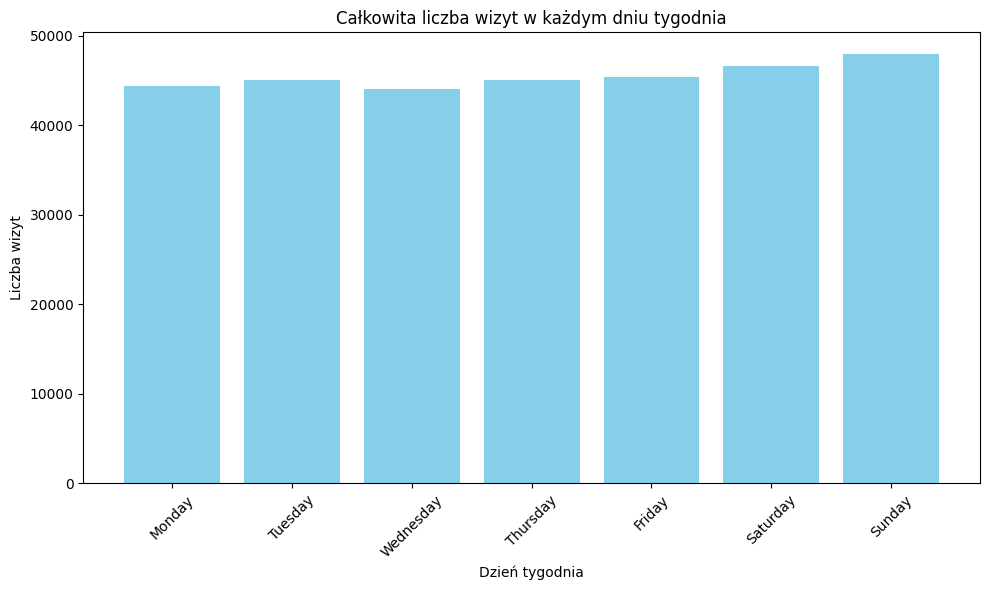

In [59]:
# Tworzymy wykres słupkowy
plt.figure(figsize=(10, 6))
plt.bar(day_of_week_visits['Day_of_week'], day_of_week_visits['No_visits'], color='skyblue')

plt.xlabel('Dzień tygodnia')
plt.ylabel('Liczba wizyt')
plt.title('Całkowita liczba wizyt w każdym dniu tygodnia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Widoczna jest największa aktywność użytkowników w weekend. Od poniedziałku do czwartku aktywnośc jest wyraźnie mniejsza.

Zadanie 6: Dokonaj prognozy aktywności użytkowników w kolejnych okresach. Wybrana metoda i horyzont czasowy prognozy zależy od Ciebie.

Na podstawie dostępnych danych, dokonana zostnaie prognoza wizyt w lipcu 2017 roku. Posłużymy się w niej zaagregowaną liczbą wizyt poprzez wszystkie kanały. Metodą prognozy będzie sieć neuronowa LSTM.

In [60]:
#Dane początkowe
data = daily_visits.copy()
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)


In [61]:
import numpy as np
from keras.models import Sequential
from keras.layers import  LSTM, Dense
from sklearn.preprocessing import MinMaxScaler




1/1 [==============================] - 1s 629ms/step


C:\Users\karol\AppData\Local\Temp\ipykernel_15716\1348677423.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_past['Forecast'].iloc[-1] = df_past['Actual'].iloc[-1]
C:\Users\karol\AppData\Local\Temp\ipykernel_15716\1348677423.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = df_past.append(df_future).set_index('Date')


<AxesSubplot: title={'center': 'Prognoza wizyt w lipcu w lipcu'}, xlabel='Date'>

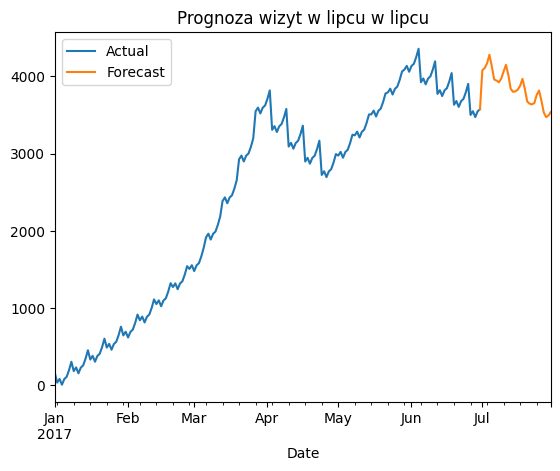

In [62]:
#Dane do treningu modelu
df = data
y = data['No_visits']
y = y.values.reshape(-1, 1)

# skalowanie danych
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(y)
y = scaler.transform(y)

# generate the input and output sequences
n_lookback = 150  # dane na których będzie się uczył model
n_forecast = 30  # długość prognozy

X = []
Y = []

for i in range(n_lookback, len(y) - n_forecast + 1):
    X.append(y[i - n_lookback: i])
    Y.append(y[i: i + n_forecast])

X = np.array(X)
Y = np.array(Y)

# budowa modelu
model = Sequential()
model.add(LSTM(units=32, return_sequences=True, input_shape=(n_lookback, 1)))
model.add(LSTM(units=32))
model.add(Dense(n_forecast))



model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X, Y, epochs=100, batch_size=8, verbose=0)

#prognozowanie
X_ = y[- n_lookback:]  
X_ = X_.reshape(1, n_lookback, 1)

Y_ = model.predict(X_).reshape(-1, 1)
Y_ = scaler.inverse_transform(Y_)

# zapis wyników
df_past = df[['No_visits']].reset_index()
df_past.rename(columns={'index': 'Date', 'No_visits': 'Actual'}, inplace=True)
df_past['Date'] = pd.to_datetime(df_past['Date'])
df_past['Forecast'] = np.nan
df_past['Forecast'].iloc[-1] = df_past['Actual'].iloc[-1]

df_future = pd.DataFrame(columns=['Date', 'Actual', 'Forecast'])
df_future['Date'] = pd.date_range(start=df_past['Date'].iloc[-1] + pd.Timedelta(days=1), periods=n_forecast)
df_future['Forecast'] = Y_.flatten()
df_future['Actual'] = np.nan

results = df_past.append(df_future).set_index('Date')

# wykres
results.plot(title='Prognoza wizyt w lipcu w lipcu')